<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Probability Density Function

The gaussian distribution (as introduced in the lecture notes on page 125 as of 2020) will be of great importance to this course (and life in general). Its pdf is plotted below.
$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X} \exp \left(-\frac{(x-m_X)^2}{2\sigma_X^2} \right) \propto \exp \left ( - \frac{x^2}{2\sigma_X^2} + x \frac{m_X}{\sigma_X^2}\right)$$


In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
m_xG = 0
sigma_xG = 1
def update_parameters(m_x, sigma_x):
  global m_xG, sigma_xG
  m_xG, sigma_xG = m_x, sigma_x
widgets.interact(update_parameters, m_x = widgets.FloatSlider(min=-10, max=10, value=0), sigma_x = widgets.FloatSlider(min=0.1, max=10, value=1));

#Important Stuff
################################################################################
#function to be plotted
gaussian_pdf = lambda x, m_x, sigma_x: 1/(np.sqrt(2*np.pi)*sigma_x) * np.exp(-(x-m_x)**2 / (2*sigma_x**2))
################################################################################

#range to display
x_values = np.arange(-10,10,0.1)

def plot():
  y_values = gaussian_pdf(x_values, m_xG, sigma_xG)

  fig, ax = plt.subplots(figsize=(12, 8))
  ax.grid()
  ax.set_xlabel('$x$', fontsize=14)
  ax.set_ylabel('$f(x \mid \mu_x, \sigma_x)$', fontsize=14)
  ax.axis(xmin=x_values[0], xmax=x_values[-1])
  ax.plot(x_values, y_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(FloatSlider(value=0.0, description='m_x', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

The gaussian distribution is the most common model for noise. It also occurs virtually everywhere in nature. Why is that? In our world many entities (such as age, height, IQ test scores) can be thought of as the sum of (infinitely) many random binary processes, modelled by a bernoulli random variable, with vanishing likelihood. By the central limit theorem the binomial distribution approaches the gaussian distribution.

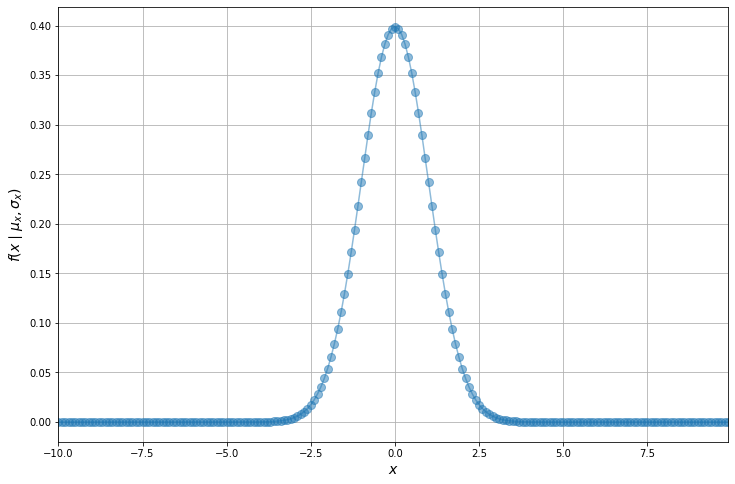

In [2]:
plot()

# Problem 4.28 (as of 2020)

A deadly disease affects a fraction $p$ of the population, i.e.
$$P("subject\ is\ sick") = p$$ We have a reliable test to detect the disease, i.e. $$P("test\ positive" | "subject\ is\ sick") = 1$$ However, for a fraction $\alpha$ of healthy subjects a false alarm occurs, i.e.
$$P("test\ positive" | "subject\ is\ healthy") = \alpha$$

Say you went to the doctor and received a positive test, is it time to call your relatives, make amends and hire a will attorney? Let us find out!

We may apply Bayes rule to get
$$P("subject\ is\ sick" | "test\ is\ positive") = \frac{P("test\ is\ positive" | "subject\ is\ sick") \cdot P("subject\ is\ sick")}{P("test\ is\ positive")} = \frac{P("T\ is\ positive" | "S\ is\ sick") \cdot P("S\ is\ sick")}{P("T\ is\ positive" | "S\ is\ sick")\cdot P("S\ is\ sick") + P("T\ is\ positive" | "S\ is\ healthy")\cdot (1-P("S\ is\ sick"))}$$

In [20]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#-------------------------------------------------------------------------------

#test is positive given subject is sick, test is positive given subject is healthy, subject is sick
def calculateBayes(tpss, tpsh, ss):
  return tpss * ss / (tpss * ss + tpsh * (1-ss) + 0.0000001) #0.0000001 prevents division by 0

#read in parameters
pG = 0.001
aG = 0.02
def update_probabilities(p, a):
  global pG, aG
  pG, aG = p, a
  print('P( subject is sick | test is positive) = ', calculateBayes(1, a, p))
widgets.interact(update_probabilities, p = widgets.FloatSlider(min=0, max=1, value=0.001, step = 0.001, readout_format='.3f'), a = widgets.FloatSlider(min=0, max=1, value=0.02, step = 0.01, description = 'alpha'));

def illustrate():
  #range to display
  p_values = np.arange(0,1,0.001)
  a_values = np.arange(0,1,0.01)
  P, A = np.meshgrid(p_values, a_values)

  f_values = calculateBayes(1, A, P)

  fig = plt.figure(figsize=(20, 8))

  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.plot_surface(A, P, f_values, cmap='terrain', alpha=0.6)
  ax.plot_wireframe(A, P, f_values, color='black', alpha=0.5, linewidths=1)
  ax.set_xlabel('$P(test\ positive | subject\ is\ healthy) = alpha$', fontsize = 20, labelpad = 15)
  ax.set_ylabel('$P(subject\ is\ sick) = p$', fontsize = 20, labelpad = 15)
  ax.set_zlabel('$P(subject\ is\ sick | test\ is\ positive)$', fontsize = 20, labelpad = 15)

def plot_confusion():
  fig, ax = plt.subplots(figsize=(10,1.5))
  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')
  ax.axis('tight')
  df = pd.DataFrame([[int(1000*pG), int(1000*aG*(1-pG))],
                     [0, int(1000*(1-aG)*(1-pG))]])
  t = ax.table(cellText=df.values, colLabels=('subject sick', 'subject healthy'), rowLabels=('test positive', 'test negative'), loc='center')
  t.auto_set_font_size(False)
  t.set_fontsize(12)
  fig.tight_layout()
  plt.show()

interactive(children=(FloatSlider(value=0.001, description='p', max=1.0, readout_format='.3f', step=0.001), Fl…

Assuming a population of about 1000 people the following confusion matrix may show the distribution of true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). 

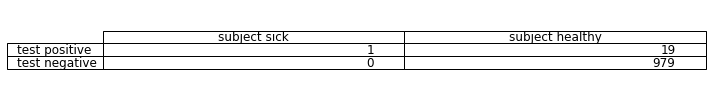

In [21]:
plot_confusion()

We can plot the dependencies on a graph:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


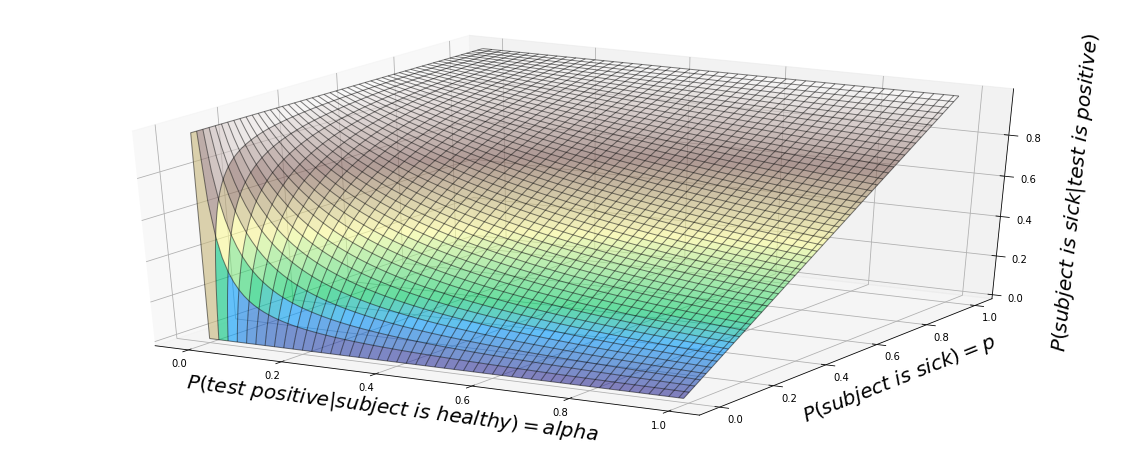

In [5]:
illustrate()